In [17]:
import sys
DEBUG = True

In [99]:
def set_to_str(s):
    to_return = ''
    for (i,A) in enumerate(s):
        to_return += str(A)
        if i != len(s)-1:
            to_return += ' '
    return to_return

class FD:
    # A FD consists in two sets of attributes
    # 'left -> right'
    def __init__(self, left_p = [], right_p = []):
        self.left = set(left_p)
        self.right = set(right_p)
    
    def __repr__(self):
        return set_to_str(self.left)+' -> '+set_to_str(self.right)

# Check if an input row is a comment
def is_comment(row):
    return len(row.split('#')) > 1
    

# Input from a file or stdin (if file_name = '')
def read_input(sigma, file_name = ''):
    if file_name != '':
        f = open(file_name,"r")
    else:
        f = sys.stdin
        
    raw_data = f.read()
    if f is not sys.stdin:
        f.close()
    
    # Split by lines
    data = raw_data.split('\n')
    # Remove empty lines
    data = list(filter(lambda x: x != '', data))
    
    for row in data:
        if not is_comment(row):
            arrow_split = row.split('->')
            
            # At this point only data of the form
            # A B C -> D E
            assert(len(arrow_split) == 2)
            
            left_side = arrow_split[0]
            right_side = arrow_split[1]
            
            # Get nice lists
            # e.g: A B C -> D E becomes
            # ['A','B','C'] and ['D','E']
            left_split = list(filter(lambda x: x != '', left_side.split(' ')))
            right_split = list(filter(lambda x: x != '', right_side.split(' ')))
            
            # Constructing the associated FD
            FD_to_add = FD(left_split,right_split)
            
            if DEBUG:
                print('Adding the FD:',FD_to_add, 'to Sigma')
            
            # Add the FD to sigma
            sigma.append(FD(left_split,right_split))        

In [100]:
sigma = []
read_input(sigma,'custom_examples/closure_improved_testNonStandard.txt')

Adding the FD:  -> A to Sigma
Adding the FD: B A -> C to Sigma


In [39]:
# Naive closure algorithm
# With sigma a list of FDs and X a set of attributes
def closure_naive(sigma, X):
    closure = set(X)
    done = False
    while not done:
        done = True
        for fd in sigma:
            W,Z = fd.left,fd.right
            # <= overloads the 'issubset' operation
            if W <= closure and not (Z <= closure):
                # | overloads the 'union' operation
                closure = closure | Z
                done = False
    return closure

In [108]:
# Auxiliary function for the improved
# closure algorithm
# With sigma a list of FDs
# count and fd_list mutable structure to compute
def closure_improved_aux(sigma, count, fd_list): 
    for (i,fd) in enumerate(sigma):
        count[i] = len(fd.left)
        for att in fd.left:
            if not att in fd_list:
                fd_list[att] = []
            fd_list[att].append(i)
            
    if DEBUG:
        for A in fd_list:
            print('List['+A+']')
            for i in fd_list[A]:
                print('\t'+str(sigma[i]))
        print()
        for i in range(len(sigma)):
            print('count['+str(sigma[i])+'] = '+str(count[i]))
        

# Improved closure algorithm
# With sigma a list of FDs and X a set of attributes
def closure_improved(sigma, X):
    
    # Count is an array which asssociates
    # FD's ID to their left member size
    count = [0]*len(sigma)
    
    # fd_list in a dictionary that associates
    # to an attribute the list of FD's ID
    # where it appears on the left
    fd_list = {}
    
    # Initialize both count and fd_list
    closure_improved_aux(sigma, count, fd_list)
    
    closure = set(X)
    update = set(X)
    
    # To solve 4.3 bug
    for fd in sigma:
        if len(fd.left) == 0:
            closure = closure | fd.right
            update = update | fd.right
    
    while len(update) != 0:
        A = update.pop()
        if DEBUG:
            print('Current attribute:', A)
            
        if not A in fd_list:
            continue
        
        for i in fd_list[A]:
            count[i] = count[i]-1
            if count[i] == 0:
                if DEBUG:
                    print('\t',sigma[i],'becomes empty')
                Z = sigma[i].right
                # - overloads difference operation
                update = update | (Z-closure)
                closure = closure | Z
    return closure

In [109]:
print(set_to_str(closure_improved(sigma,set(['B']))))

List[B]
	B A -> C
List[A]
	B A -> C

count[ -> A] = 0
count[B A -> C] = 2
Current attribute: B
Current attribute: A
	 B A -> C becomes empty
Current attribute: C
B C A


In [112]:
' '.join(['a','b','c'])

'a b c'

In [113]:
a = set(['a','b','c'])

In [114]:
b = list(a)

In [115]:
b

['b', 'c', 'a']

In [116]:
a

{'a', 'b', 'c'}

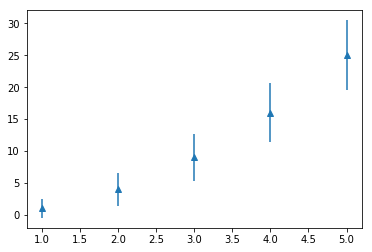

In [117]:
import matplotlib.pyplot as plt
import numpy as np

x = np.array([1, 2, 3, 4, 5])
y = np.power(x, 2) # Effectively y = x**2
e = np.array([1.5, 2.6, 3.7, 4.6, 5.5])

plt.errorbar(x, y, e, linestyle='None', marker='^')

plt.show()

In [118]:
f = open('results.tsv', 'r')
l = f.read()
f.close()

In [119]:
l = l.split('\n')[1:]

In [130]:
x = set([])
y_nlin = {}
y_lin = {}

for r in l:
    ll = r.split('\t')
    if len(ll) != 3:
        continue
    n = int(ll[0])
    x.update([n])
    if not n in y_nlin:
        y_nlin[n] = []
    if not n in y_lin:
        y_lin[n] = []
    
    y_lin[n].append(float(ll[1].replace(",",".")))
    y_nlin[n].append(float(ll[2].replace(",",".")))

for n in y_lin:
    y_lin[n] = np.array(y_lin[n])
    y_nlin[n] = np.array(y_nlin[n])
x = sorted(list(x))

In [155]:
y_1 = [y_lin[n].mean() for n in x]
e_1 = [y_lin[n].std() for n in x]
y_2 = [y_nlin[n].mean() for n in x]
e_2 = [y_nlin[n].std() for n in x]
import pylab

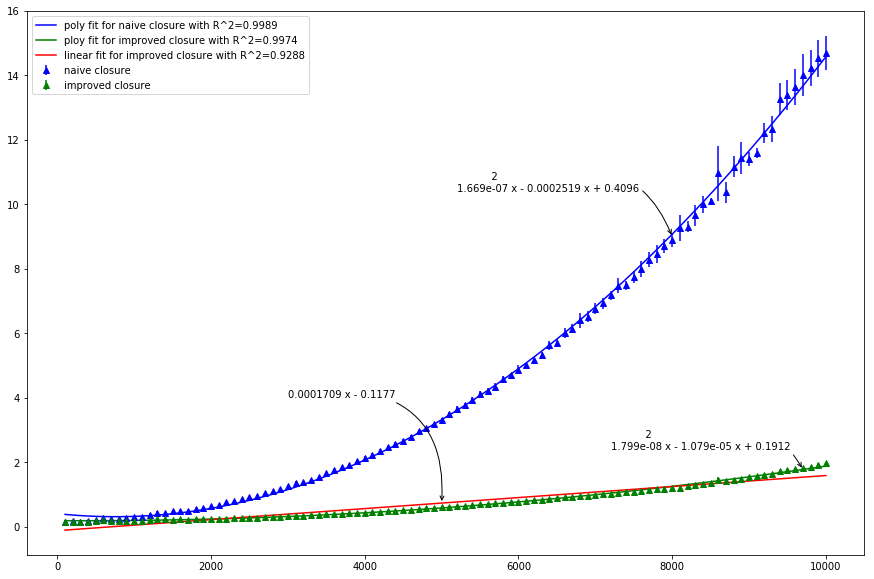

In [200]:
plt.figure(figsize=(15,10))
from sklearn.metrics import r2_score

fit = np.polyfit(x,y_1,2)
fit_fn = np.poly1d(fit)
pylab.annotate(fit_fn, xy=(8000, 9.0), xytext=(8000-.4*7000, 10+.4*1),
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=-0.5'))
R1 = round(r2_score(y_1, fit_fn(x)),4)
plt.plot(x,fit_fn(x),c='b', label='poly fit for naive closure with R^2='+str(R1))
plt.errorbar(x, y_1, e_1, linestyle='None', marker='^', label='naive closure',c='b')

fit = np.polyfit(x,y_2,2)
fit_fn = np.poly1d(fit)
R2 = round(r2_score(y_2, fit_fn(x)),4)
pylab.annotate(fit_fn, xy=(9700, fit_fn(9700)), xytext=(10000-.4*7000, 2+.4*1),
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=-0.5'))
plt.plot(x,fit_fn(x),c='g', label='ploy fit for improved closure with R^2='+str(R2))


fit = np.polyfit(x,y_2,1)
fit_fn = np.poly1d(fit)
R2 = round(r2_score(y_2, fit_fn(x)),4)
plt.plot(x,fit_fn(x),c='r', label='linear fit for improved closure with R^2='+str(R2))

pylab.annotate(fit_fn, xy=(5000, fit_fn(5000)), xytext=(3000, 4),
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=-0.5'))
plt.errorbar(x, y_2, e_2, linestyle='None', marker='^', label='improved closure', c='g')
plt.legend()
plt.show()